In [1]:
from tqdm.notebook import tqdm
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

tqdm.pandas()

In [2]:
## Run the following to compute the mappings for host locations
#!python3 -m scripts.mappings_host_location

## Load Visualization Pipeline for all the periods
## Insert one of the following arguments to run the visualization:
## - sep
## - dic
## - mar
## - jun

#!python3 -m scripts.pipeline_viz sep
#!python3 -m scripts.pipeline_viz dic
#!python3 -m scripts.pipeline_viz mar
#!python3 -m scripts.pipeline_viz jun

#!python3 -m scripts.pipeline_ML sep
#!python3 -m scripts.pipeline_ML dic
#!python3 -m scripts.pipeline_ML mar
#!python3 -m scripts.pipeline_ML jun

# Datasets analysis

## Sep dataset

In [3]:
df_sep = pd.read_csv("data/data_sep/d_listings.csv")
df_sep.shape

(7950, 75)

In [4]:
sep_nas = pd.DataFrame(df_sep.isnull().sum(), columns=["NAs"])
sep_nas.loc[sep_nas["NAs"] > 0, :]

,NAs
description,111
neighborhood_overview,3208
host_location,1754
host_about,3529
host_response_time,829
host_response_rate,829
host_acceptance_rate,535
host_is_superhost,205
host_neighbourhood,3536
neighbourhood,3208


### Drop columns with too many NAs

In [5]:
df_sep.drop(["neighborhood_overview",
             "host_about",
             "host_neighbourhood",
             "neighbourhood",
             "bathrooms",
             "calendar_updated",
             "license",
             "review_scores_accuracy",
             "review_scores_cleanliness",
             "review_scores_checkin",
             "review_scores_communication",
             "review_scores_location",
             "review_scores_value"],
            axis=1,
            inplace=True)

### Drop not useful

In [6]:
df_sep.drop([
    "listing_url",
    "scrape_id",
    "last_scraped",
    "source",
    "name",
    "description",
    "picture_url",
    "host_url",
    "host_name",
    "host_thumbnail_url",
    "host_picture_url",
    "neighbourhood_group_cleansed",
    "minimum_minimum_nights",
    "maximum_minimum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights",
    "minimum_nights_avg_ntm",
    "maximum_nights_avg_ntm",
    "has_availability",
    "availability_30",
    "availability_60",
    "availability_90",
    "availability_365",
    "calendar_last_scraped",
    "number_of_reviews_ltm",
    "number_of_reviews_l30d",
    "instant_bookable",
],
axis=1,
inplace=True)

df_sep.set_index("id", inplace=True)


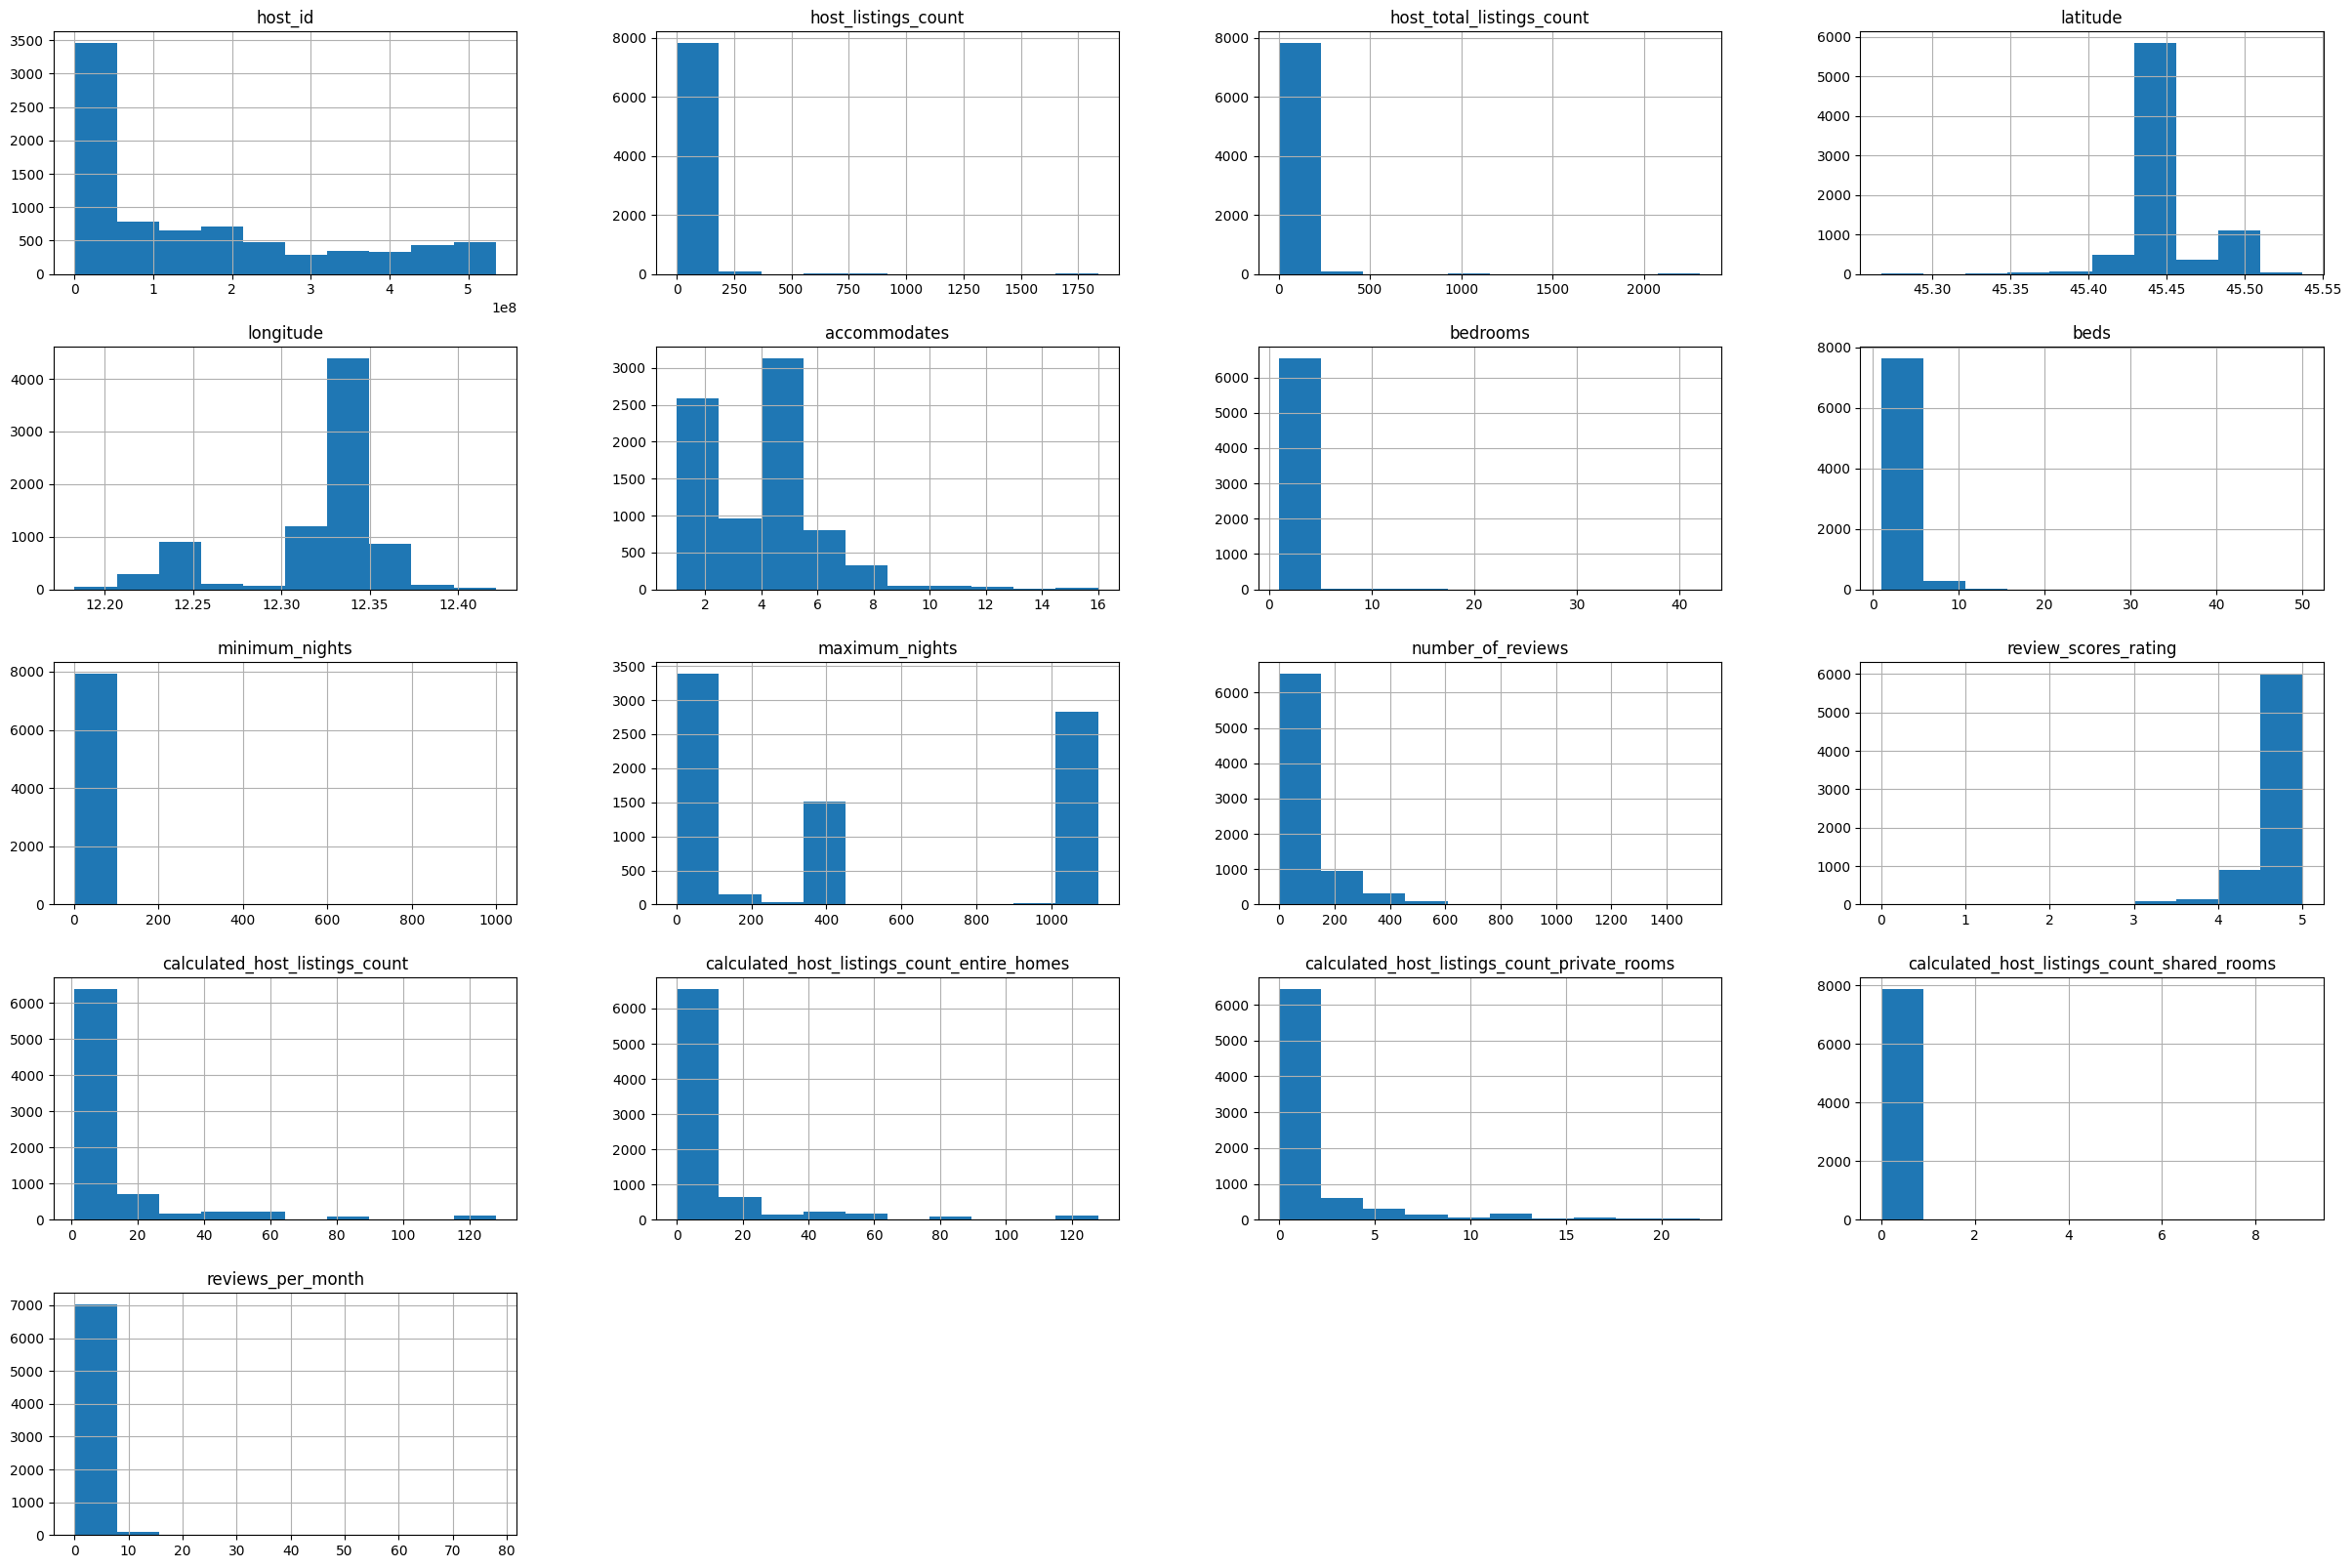

In [7]:
see_histograms = df_sep.copy()

pd.set_option('future.no_silent_downcasting', True)
see_histograms.replace({'f': 0, 't': 1}, inplace=True)

see_histograms.hist(figsize=(30,20));

In [8]:
#df_nas_columns = pd.DataFrame(df_sep.isnull().sum(axis=1), columns=["NAs"])


df_nas_columns = pd.DataFrame({
    'NAs': df_sep.isnull().sum(axis=1),
    'Columns_with_NAs': df_sep.apply(lambda x: ', '.join(x.index[x.isnull()]), axis=1)
})
df_nas_columns.loc[df_nas_columns["NAs"]>4]

,NAs,Columns_with_NAs
id,,
829284975573971493,8,"host_response_time, host_response_rate, host_a..."
22925979,8,"host_response_time, host_response_rate, host_a..."
37198373,6,"host_location, host_acceptance_rate, first_rev..."
731748491112912461,5,"bedrooms, first_review, last_review, review_sc..."
45784539,5,"host_location, first_review, last_review, revi..."
...,...,...
949026541882771236,5,"bedrooms, first_review, last_review, review_sc..."
720853914889671458,5,"bedrooms, first_review, last_review, review_sc..."
740584934427192854,5,"bedrooms, first_review, last_review, review_sc..."


### Drop the rows where more than 5 features are missing

In [9]:
more_than_5_missing = df_nas_columns.loc[df_nas_columns["NAs"]>5, :].index.tolist()
df_sep.drop(more_than_5_missing, inplace=True)
df_sep.shape

(7685, 34)

## Handling amenities

In [10]:
df_sep["amenities_number"] = df_sep["amenities"].apply(lambda x: len(x))

In [11]:
amenities_lists = df_sep["amenities"].tolist()

In [19]:
amenities_counter = {}

for el in amenities_lists:
    for e in el.strip('][').split(', '):
        try:
            amenities_counter[e.strip('"')] += 1
        except:
            amenities_counter[e.strip('"')] = 1

In [49]:
amenities_counter = dict(sorted(amenities_counter.items(), key=lambda item: item[1], reverse=True))
amenities_counter

{'Hair dryer': 7022,
 'Essentials': 6999,
 'Wifi': 6949,
 'Kitchen': 6371,
 'Hot water': 6054,
 'Hangers': 5961,
 'Refrigerator': 5678,
 'Dishes and silverware': 5675,
 'Heating': 5644,
 'Iron': 5170,
 'Bed linens': 5048,
 'Cooking basics': 4985,
 'Air conditioning': 4591,
 'Shampoo': 4437,
 'TV': 4414,
 'Microwave': 4088,
 'Coffee maker': 3450,
 'Extra pillows and blankets': 3311,
 'Bidet': 3174,
 'Washer': 3169,
 'Host greets you': 2901,
 'Oven': 2852,
 'Dedicated workspace': 2821,
 'Dishwasher': 2788,
 'Stove': 2765,
 'Dining table': 2685,
 'Hot water kettle': 2640,
 'Freezer': 2533,
 'Cleaning products': 2492,
 'First aid kit': 2466,
 'Self check-in': 2464,
 'Long term stays allowed': 2456,
 'Luggage dropoff allowed': 2418,
 'Private entrance': 2395,
 'Shower gel': 2348,
 'Body soap': 2306,
 'Fire extinguisher': 2226,
 'Room-darkening shades': 2125,
 'Wine glasses': 1955,
 'Smoke alarm': 1921,
 'Drying rack for clothing': 1864,
 'Crib': 1845,
 'Carbon monoxide alarm': 1607,
 'Pets 

### Remapping amenities into a smaller dictionary

In [65]:
amenities_remapping = {}

#### wifi

In [66]:
pattern = r'\b(wifi|internet)\b'
regex = re.compile(pattern, re.IGNORECASE)

for am in list(amenities_counter.keys()):
    if regex.search(am):
        amenities_remapping[am] = "wifi"

#### TV

In [67]:
pattern = r'\b(tv|television)\b'
regex = re.compile(pattern, re.IGNORECASE)

for am in list(amenities_counter.keys()):
    if regex.search(am):
        amenities_remapping[am] = "tv"


#### Kitchen

In [68]:
pattern = r'\b(kitchen|cooking|cucina)\b'
regex = re.compile(pattern, re.IGNORECASE)

for am in list(amenities_counter.keys()):
    if regex.search(am):
        amenities_remapping[am] = "kitchen"


### Hair dryer

In [71]:
pattern = r'\b(hair|capelli|soap|sapone|bidet|shampoo|bathtub|gel)\b'
regex = re.compile(pattern, re.IGNORECASE)

for am in list(amenities_counter.keys()):
    if regex.search(am):
        amenities_remapping[am] = "toiletry"

#### soap

In [74]:
amenities_remapping

{'Wifi': 'wifi',
 'Pocket wifi': 'wifi',
 'Wifi \\u2013 31 Mbps': 'wifi',
 'Fast wifi \\u2013 96 Mbps': 'wifi',
 'Wifi \\u2013 36 Mbps': 'wifi',
 'Wifi \\u2013 35 Mbps': 'wifi',
 'Wifi \\u2013 26 Mbps': 'wifi',
 'Fast wifi \\u2013 78 Mbps': 'wifi',
 'Wifi \\u2013 34 Mbps': 'wifi',
 'Wifi \\u2013 30 Mbps': 'wifi',
 'Wifi \\u2013 45 Mbps': 'wifi',
 'Wifi \\u2013 10 Mbps': 'wifi',
 'Fast wifi \\u2013 79 Mbps': 'wifi',
 'Fast wifi \\u2013 86 Mbps': 'wifi',
 'Fast wifi \\u2013 89 Mbps': 'wifi',
 'Fast wifi \\u2013 95 Mbps': 'wifi',
 'Fast wifi \\u2013 62 Mbps': 'wifi',
 'Fast wifi \\u2013 80 Mbps': 'wifi',
 'Fast wifi \\u2013 93 Mbps': 'wifi',
 'Fast wifi \\u2013 85 Mbps': 'wifi',
 'Fast wifi \\u2013 622 Mbps': 'wifi',
 'Fast wifi \\u2013 71 Mbps': 'wifi',
 'Fast wifi \\u2013 88 Mbps': 'wifi',
 'Fast wifi \\u2013 81 Mbps': 'wifi',
 'Fast wifi \\u2013 262 Mbps': 'wifi',
 'Fast wifi \\u2013 55 Mbps': 'wifi',
 'Fast wifi \\u2013 250 Mbps': 'wifi',
 'Wifi \\u2013 41 Mbps': 'wifi',
 'Wifi \\u201